In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
from numpy import percentile

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Reading the CSV file**

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#**To view the columns in the dataset**

In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#**Information about the dataset**

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#**Checking for Null values**

In [ ]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


#**Checking for Null values (sum)**

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#**Replacing zeros with NAN**

In [ ]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#**Null count analysis plot before replacing with Mean**

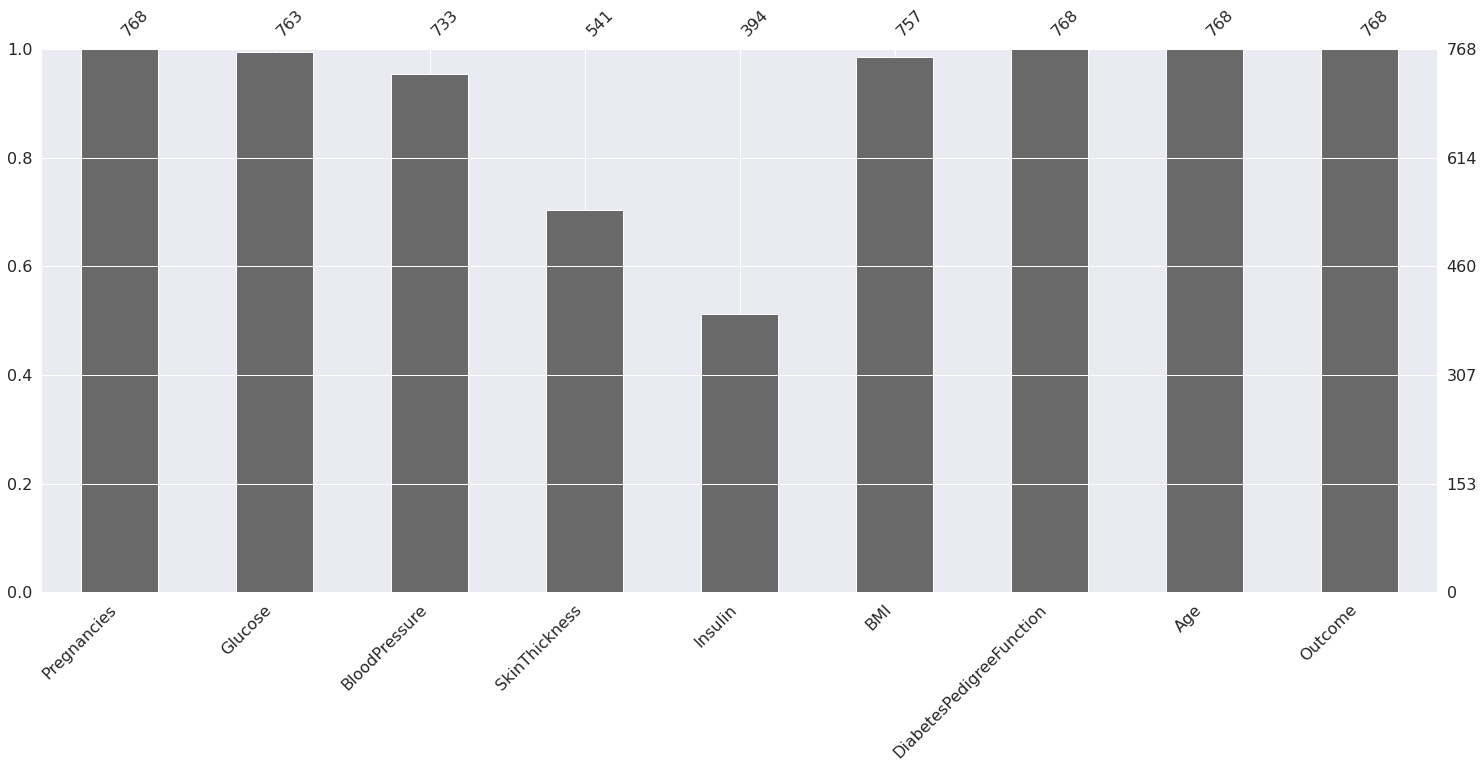

In [ ]:
p = msno.bar(diabetes_df_copy)

#**Plotting the data distribution plots before removing the null values**

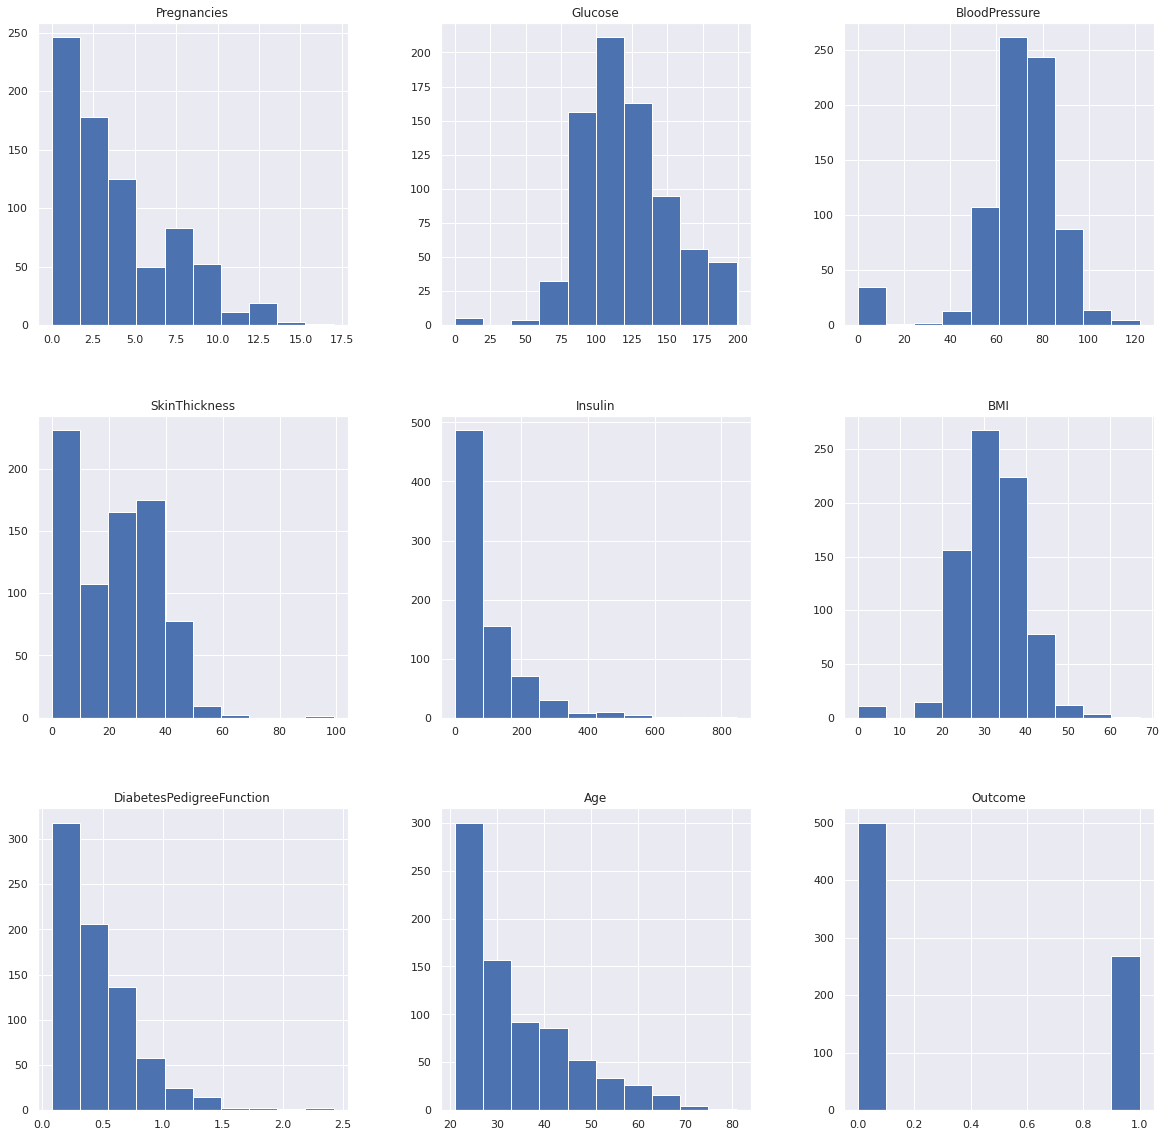

In [ ]:
p = diabetes_df.hist(figsize = (20,20),)

#**Filling the null values with the Mean**

In [ ]:
diabetes_df_copy['Glucose'].fillna(120.89, inplace = True)
diabetes_df_copy['BloodPressure'].fillna(69.11, inplace = True)
diabetes_df_copy['SkinThickness'].fillna(20.54, inplace = True)
diabetes_df_copy['Insulin'].fillna(79.80, inplace = True)
diabetes_df_copy['BMI'].fillna(32, inplace = True)
diabetes_df_copy['DiabetesPedigreeFunction'].fillna(0.47, inplace = True)
diabetes_df_copy['Age'].fillna(33, inplace = True)


In [ ]:
from pathlib import Path
filepath = Path('folder/subfolder/final.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
diabetes_df_copy.to_csv(filepath)

#**Checking for the null values after replacing with null values**

In [ ]:
diabetes_df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#**Plotting the data distribution plots after removing the null values**

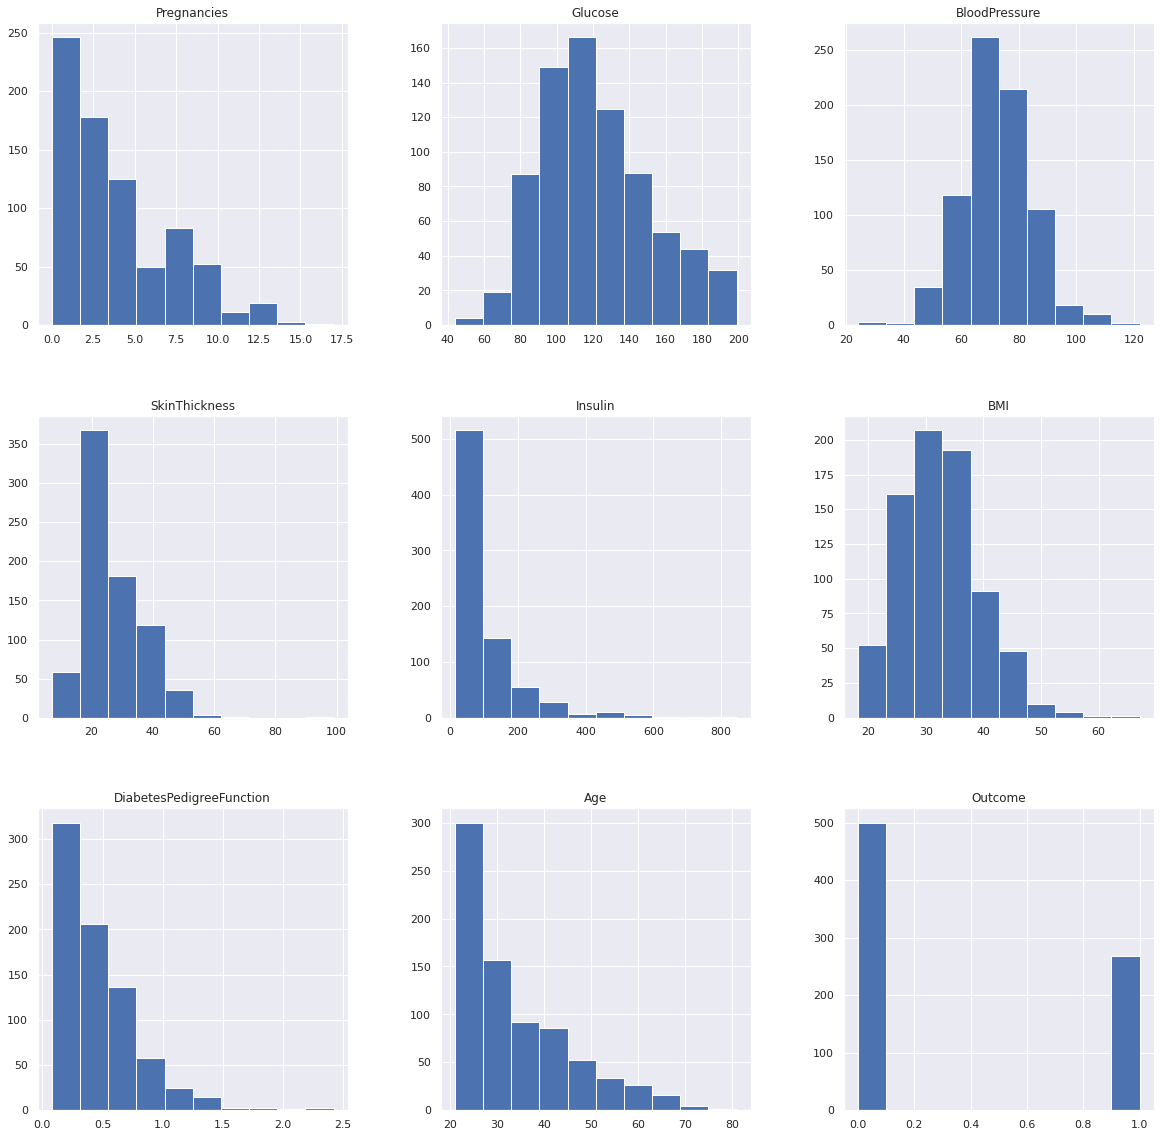

In [ ]:
p = diabetes_df_copy.hist(figsize = (20,20))

#**Null count analysis plot after replacing with Mean**

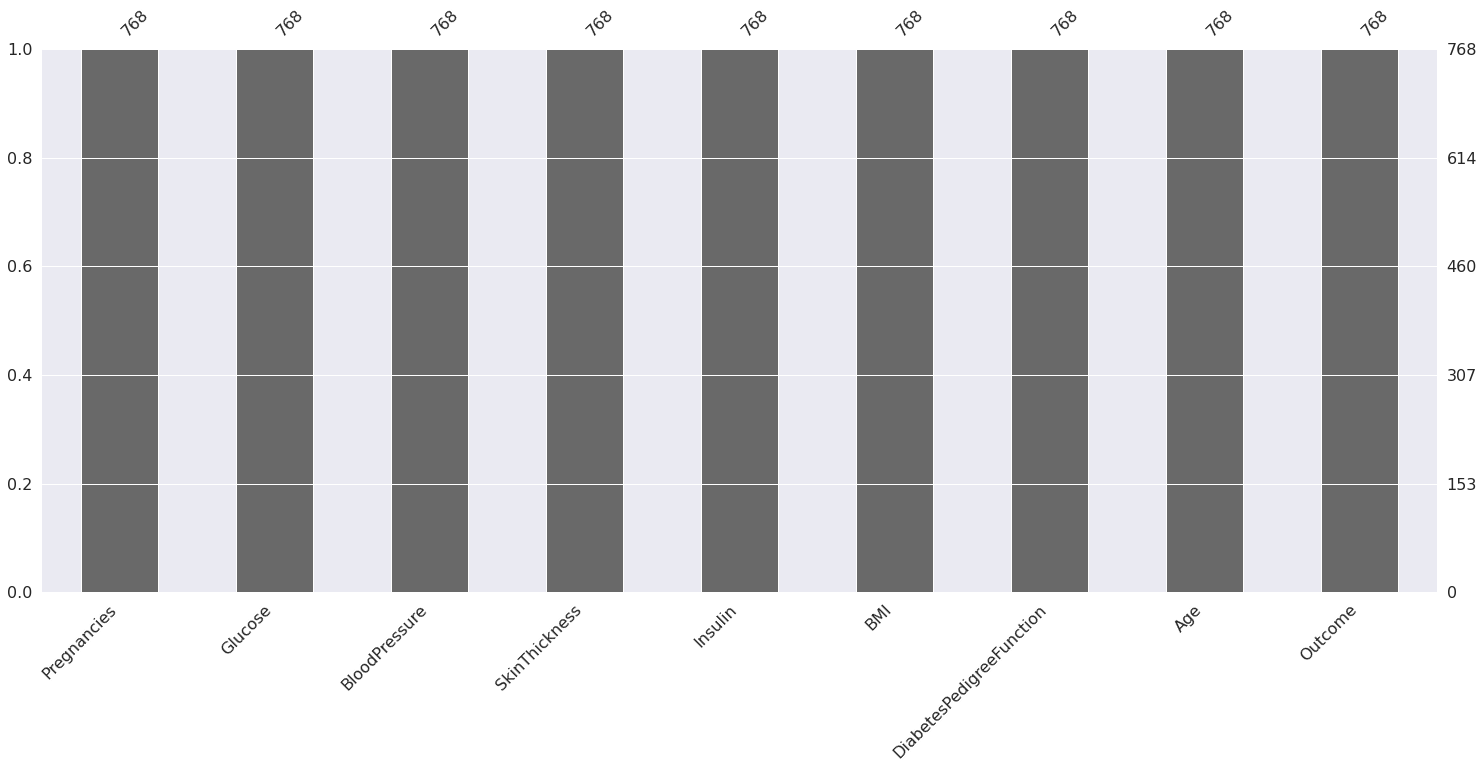

In [ ]:
p = msno.bar(diabetes_df)

#**Outlier and extreme values analysis using Inter quartile range(IQR)**

In [ ]:
diabetes_df_copyy = diabetes_df.copy(deep = True)

In [ ]:
def iqr_trimming(df, cols, factor):

    drop_outliers = np.array([])

    for col in cols:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        s = df[col]

        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index

        drop_outliers = np.append(drop_outliers, indexes)

    return drop_outliers


In [ ]:
a=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
iqr_trimming(diabetes_df_copyy,a,1.5)

array([ 88., 159., 298., 455.,  75., 182., 342., 349., 502.,   7.,  15.,
        18.,  43.,  49.,  60.,  78.,  81.,  84., 106., 125., 172., 177.,
       193., 222., 261., 266., 269., 300., 332., 336., 347., 357., 362.,
       426., 430., 435., 453., 468., 484., 494., 522., 533., 535., 549.,
       589., 597., 601., 604., 619., 643., 691., 697., 703., 706., 579.,
         8.,  13.,  54., 111., 139., 153., 186., 220., 228., 231., 247.,
       248., 258., 286., 296., 360., 370., 375., 392., 409., 415., 480.,
       486., 519., 574., 584., 612., 645., 655., 695., 707., 710., 715.,
       753.,   9.,  49.,  60.,  81., 120., 125., 145., 177., 193., 247.,
       303., 371., 426., 445., 494., 522., 673., 684., 706.,   4.,  12.,
        39.,  45.,  58., 100., 147., 187., 218., 228., 243., 245., 259.,
       292., 308., 330., 370., 371., 383., 395., 445., 534., 593., 606.,
       618., 621., 622., 659., 661., 123., 363., 453., 459., 489., 537.,
       666., 674., 684.])

In [ ]:
dropped = np.unique(iqr_trimming(diabetes_df_copyy,diabetes_df_copyy.columns,1.5))
print(dropped)

[  4.   7.   8.   9.  12.  13.  15.  18.  39.  43.  45.  49.  54.  58.
  60.  75.  78.  81.  84.  88. 100. 106. 111. 120. 123. 125. 139. 145.
 147. 153. 159. 172. 177. 182. 186. 187. 193. 218. 220. 222. 228. 231.
 243. 245. 247. 248. 258. 259. 261. 266. 269. 286. 292. 296. 298. 300.
 303. 308. 330. 332. 336. 342. 347. 349. 357. 360. 362. 363. 370. 371.
 375. 383. 392. 395. 409. 415. 426. 430. 435. 445. 453. 455. 459. 468.
 480. 484. 486. 489. 494. 502. 519. 522. 533. 534. 535. 537. 549. 574.
 579. 584. 589. 593. 597. 601. 604. 606. 612. 618. 619. 621. 622. 643.
 645. 655. 659. 661. 666. 673. 674. 684. 691. 695. 697. 703. 706. 707.
 710. 715. 753.]


In [ ]:
diabetes_df_copyy.drop(dropped,inplace=True)

In [ ]:
diabetes_df_copyy.shape

(639, 9)

0    500
1    268
Name: Outcome, dtype: int64


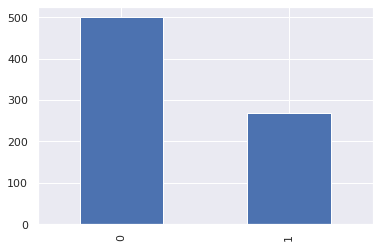

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

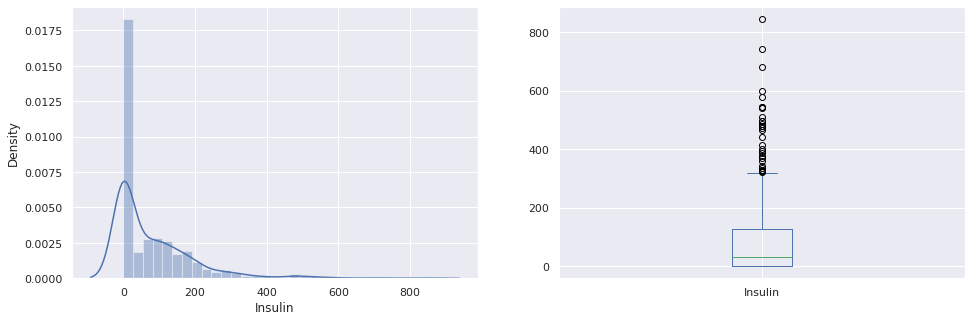

In [ ]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
import pandas as pd


In [ ]:
diabetes_df=pd.read_csv('/content/final.csv')
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,5.0,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0


#**Finding the correlation between each attribute and outcome**

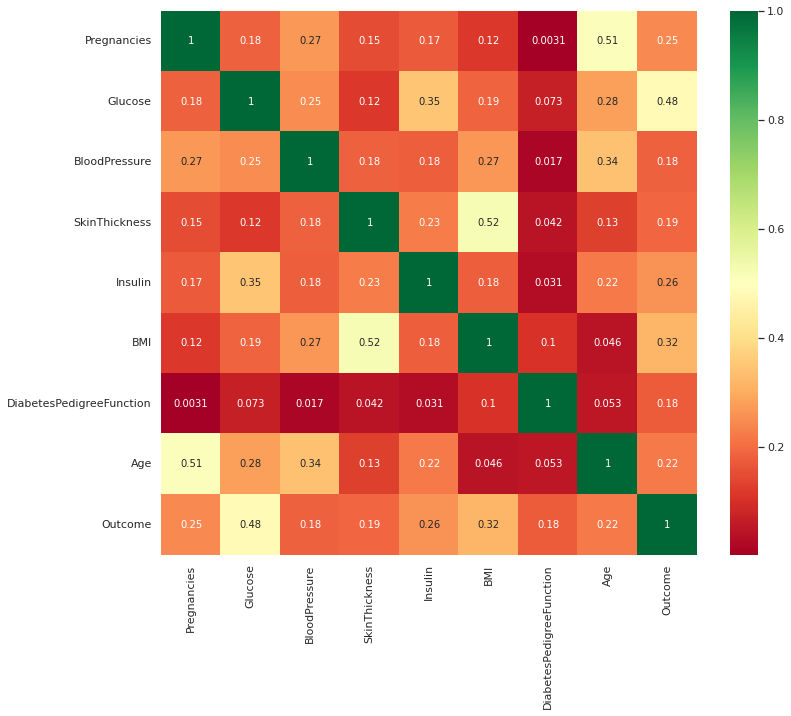

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
diabetes_df.drop(columns=['BloodPressure','SkinThickness','DiabetesPedigreeFunction'] ,axis=1, inplace=True)


#**Normalizing the data**

In [ ]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# copy the data
df_sklearn = diabetes_df.copy()

# apply normalization techniques
for column in diabetes_df.columns:
 df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))

# view normalized data
display(df_sklearn)
diabetes_df=df_sklearn

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,0.3125,0.670968,0.573168,0.393862,0.483333,1.0
1,0.0000,0.264516,0.573168,0.214834,0.166667,0.0
2,0.4375,0.896774,0.573168,0.130435,0.183333,1.0
3,0.0000,0.290323,0.309013,0.253197,0.000000,0.0
4,0.2500,0.464516,0.573168,0.189258,0.150000,0.0
...,...,...,...,...,...,...
694,0.5625,0.367742,0.678112,0.375959,0.700000,0.0
695,0.0625,0.503226,0.573168,0.475703,0.100000,0.0
696,0.2500,0.496774,0.386266,0.204604,0.150000,0.0
697,0.0000,0.529032,0.573168,0.304348,0.433333,1.0


In [ ]:

diabetes_df.describe()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.218615,0.483377,0.498758,0.354472,0.203648,0.333333
std,0.186677,0.186606,0.182273,0.168613,0.194508,0.471742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.354839,0.403433,0.232737,0.050000,0.000000
50%,0.218417,0.458065,0.573168,0.352941,0.133333,0.000000
75%,0.312500,0.593548,0.573168,0.452685,0.325000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**Splitting the dataset**

In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#**Splitting using train_test_split function**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,
                                                    random_state=7)

In [ ]:
#Check columns with zero values - checking this time so that right data should go for model training

print("Total number of rows: {0}", format(len(diabetes_df)))
print("Number of rows missing Pregnancies: {0}",
      format(len(diabetes_df.loc[diabetes_df['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(diabetes_df.loc[diabetes_df['Glucose']==0])))

print("Number of rows missing Insulin: {0}",
      format(len(diabetes_df.loc[diabetes_df['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(diabetes_df.loc[diabetes_df['BMI']==0])))

print("Number of rows missing Age: {0}", format(len(diabetes_df.loc[diabetes_df['Age']==0])))

Total number of rows: {0} 699
Number of rows missing Pregnancies: {0} 125
Number of rows missing Glucose: {0} 1
Number of rows missing Insulin: {0} 1
Number of rows missing BMI: {0} 3
Number of rows missing Age: {0} 58


In [ ]:
#Imputing zeros values in the dataset

from sklearn.impute import SimpleImputer
import numpy as np

fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

# **RandomForestClassifier**

In [ ]:
#Builidng the model using RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [ ]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7714285714285715


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


[[65  7]
 [17 16]]
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        72
         1.0       0.70      0.48      0.57        33

    accuracy                           0.77       105
   macro avg       0.74      0.69      0.71       105
weighted avg       0.76      0.77      0.76       105



# **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6952380952380952


In [ ]:
dt_train= dtree.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, dt_train)))

Accuracy_Score = 1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[58 14]
 [18 15]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78        72
         1.0       0.52      0.45      0.48        33

    accuracy                           0.70       105
   macro avg       0.64      0.63      0.63       105
weighted avg       0.69      0.70      0.69       105



# **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.780952380952381


In [ ]:
xg_train= xgb_model.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, xg_train)))

Accuracy_Score = 0.8686868686868687


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[62 10]
 [13 20]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        72
         1.0       0.67      0.61      0.63        33

    accuracy                           0.78       105
   macro avg       0.75      0.73      0.74       105
weighted avg       0.78      0.78      0.78       105



# **SVM**

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.8


In [ ]:
svm_train= svc_model.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, svm_train)))

Accuracy_Score = 0.7828282828282829


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[68  4]
 [17 16]]
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87        72
         1.0       0.80      0.48      0.60        33

    accuracy                           0.80       105
   macro avg       0.80      0.71      0.74       105
weighted avg       0.80      0.80      0.78       105



# **LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)
print('Coefficients: \n', LinearRegression_model.coef_)


Coefficients: 
 [ 0.38493305  1.04407365  0.12270346  0.5788597  -0.0434096 ]


In [ ]:
predictions = LinearRegression_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

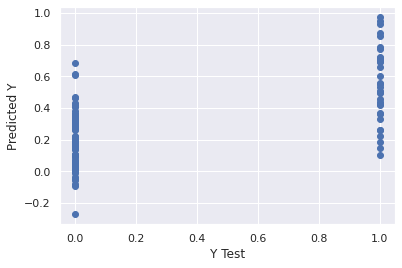

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.28947312664709346
MSE: 0.13086120165302328
RMSE: 0.3617474279839779


#**KNeighboursClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[60 12]
 [13 20]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83        72
         1.0       0.62      0.61      0.62        33

    accuracy                           0.76       105
   macro avg       0.72      0.72      0.72       105
weighted avg       0.76      0.76      0.76       105



In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,pred)))

Accuracy Score = 0.7619047619047619


In [ ]:
kn_train= knn.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train,kn_train)))

Accuracy_Score = 0.8181818181818182


# **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
Gmodel.fit(X_train, y_train)
pre=Gmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pre))
print(classification_report(y_test,pre))

[[67  5]
 [14 19]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88        72
         1.0       0.79      0.58      0.67        33

    accuracy                           0.82       105
   macro avg       0.81      0.75      0.77       105
weighted avg       0.82      0.82      0.81       105



In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,pre)))

Accuracy Score = 0.819047619047619


In [ ]:
gnb_train= Gmodel.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train,gnb_train)))

Accuracy_Score = 0.7693602693602694


# **AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
p=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, p))
print(classification_report(y_test,p))

[[60 12]
 [15 18]]
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82        72
         1.0       0.60      0.55      0.57        33

    accuracy                           0.74       105
   macro avg       0.70      0.69      0.69       105
weighted avg       0.74      0.74      0.74       105



In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,p)))

Accuracy Score = 0.7428571428571429


In [ ]:
abc_train=clf.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train,abc_train)))

Accuracy_Score = 0.8215488215488216


## **K-fold cross validation**

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold


In [ ]:
dataset = pd.read_csv('final.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1.0,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8.0,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1.0,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,5.0,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
5,3.0,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
6,10.0,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
7,8.0,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1
8,4.0,110.0,92.000000,29.15342,155.548223,37.600000,0.191,30,0
9,10.0,168.0,74.000000,29.15342,155.548223,38.000000,0.537,34,1


In [ ]:
print('Out of 100%, nearly {}% belongs to positive class'.format(round(sum(dataset.Outcome/len(dataset.Outcome)*100))))

Out of 100%, nearly 33% belongs to positive class


In [ ]:
skf = StratifiedKFold(n_splits=10)

# **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=200)
x = dataset
y = dataset.Outcome

In [ ]:
def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  model.fit(x_train, y_train)
  score = model.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

For Fold 1 the accuracy is 0.6857142857142857
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.50      0.55      0.52        22

    accuracy                           0.69        70
   macro avg       0.64      0.65      0.64        70
weighted avg       0.69      0.69      0.69        70

For Fold 2 the accuracy is 0.7857142857142857
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        47
           1       0.67      0.70      0.68        23

    accuracy                           0.79        70
   macro avg       0.76      0.76      0.76        70
weighted avg       0.79      0.79      0.79        70

For Fold 3 the accuracy is 0.7285714285714285
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        53
           1       0.46      0.65      0.54        17

    accuracy                           0.73 

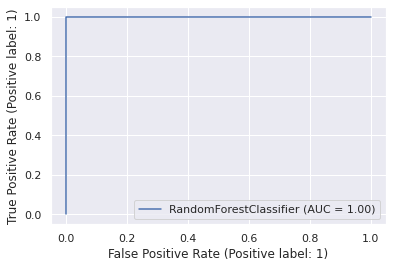

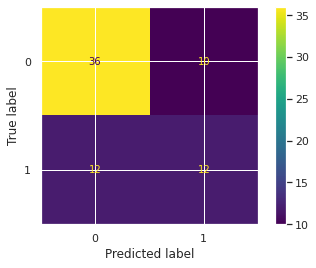

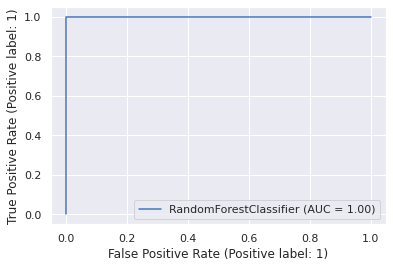

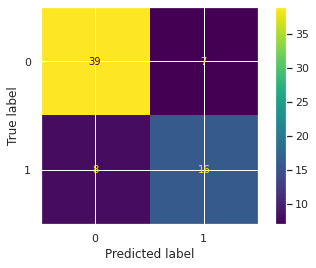

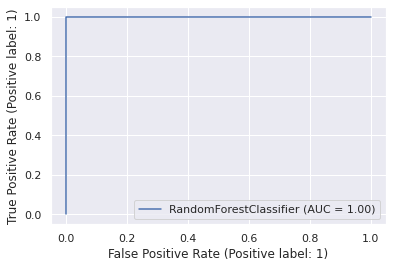

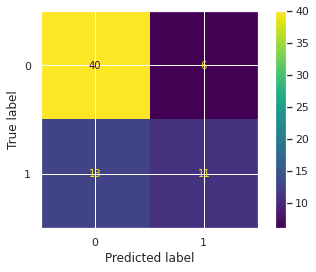

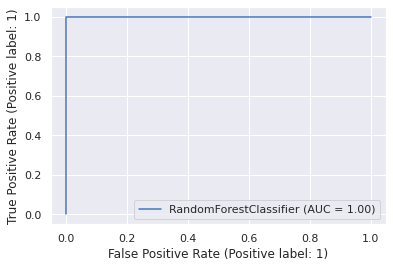

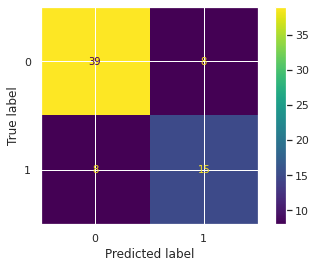

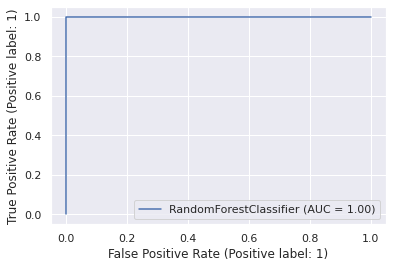

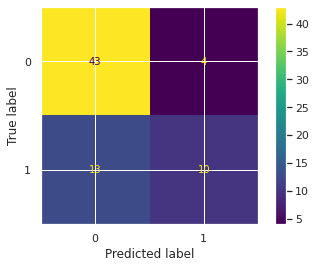

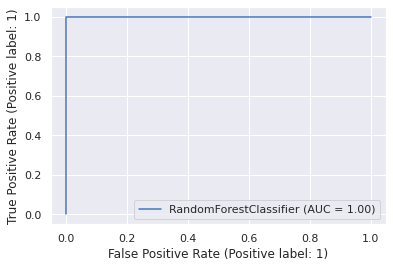

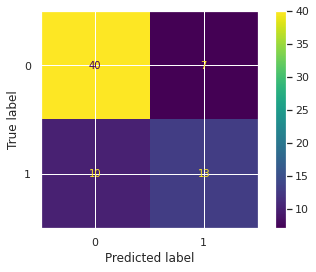

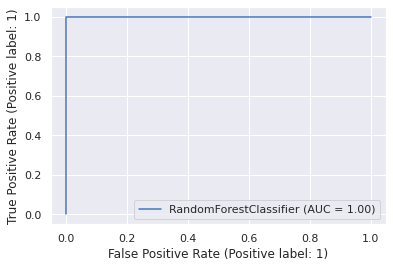

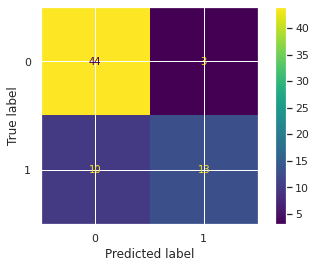

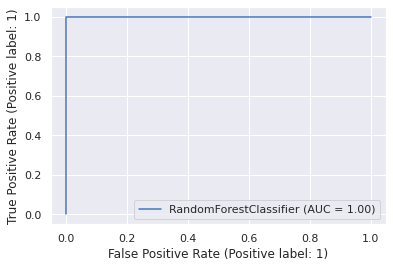

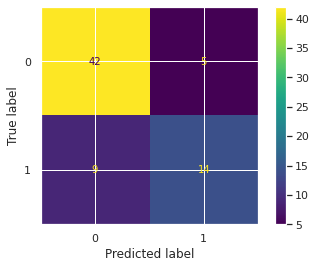

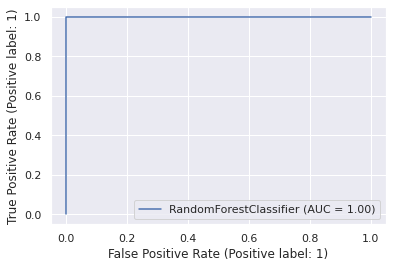

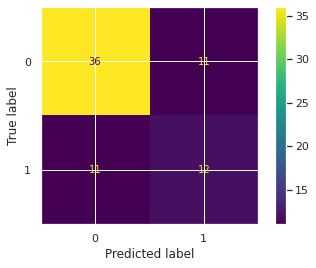

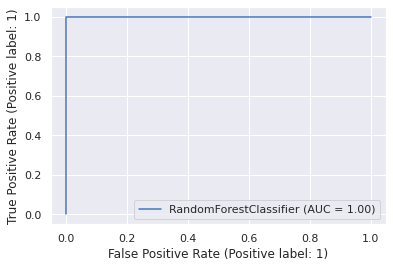

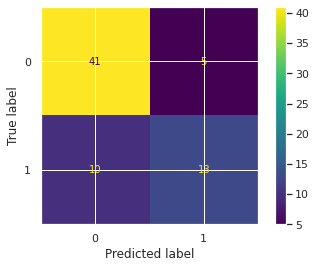

In [ ]:
dataset = pd.read_csv('final.csv')
skf = StratifiedKFold(n_splits=10)
model = RandomForestClassifier(n_estimators=200)
x = dataset
y = dataset.Outcome

lll=[]


def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  model.fit(x_train, y_train)
  score = model.score(x_test,y_test)
  y_pred=model.predict(x_test)
  lll.append(score)

  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

  from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,classification_report
  plot_roc_curve(model, x_train,y_train)
  plot_confusion_matrix(model,x_test,y_test)
  print(classification_report(y_pred,y_test))



fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

In [ ]:
print("mean accuracy:",sum(lll)/len(lll))

mean accuracy: 0.756832298136646


# **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
x = dataset
y = dataset.Outcome

In [ ]:
def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  dtree.fit(x_train, y_train)
  score = dtree.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

For Fold 1 the accuracy is 0.7428571428571429
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        44
           1       0.67      0.62      0.64        26

    accuracy                           0.74        70
   macro avg       0.72      0.72      0.72        70
weighted avg       0.74      0.74      0.74        70

For Fold 2 the accuracy is 0.6857142857142857
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.50      0.55      0.52        22

    accuracy                           0.69        70
   macro avg       0.64      0.65      0.64        70
weighted avg       0.69      0.69      0.69        70

For Fold 3 the accuracy is 0.6571428571428571
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        42
           1       0.58      0.50      0.54        28

    accuracy                           0.66 

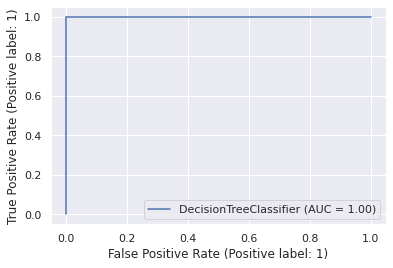

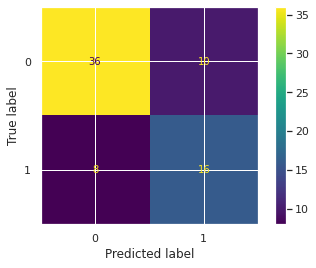

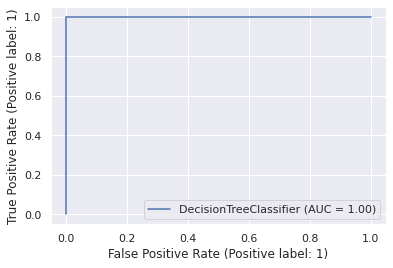

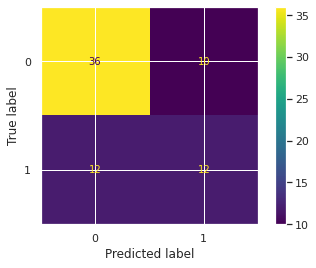

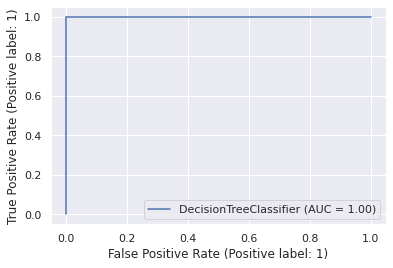

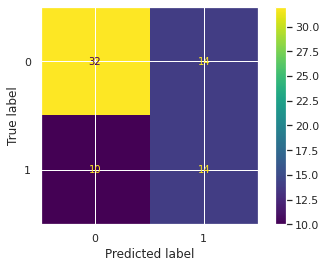

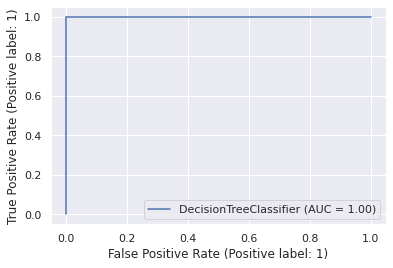

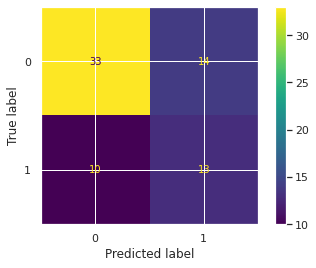

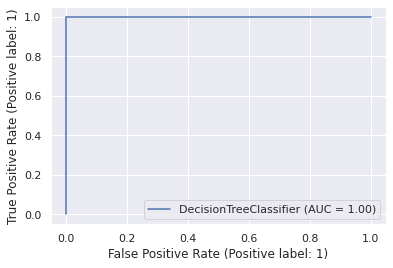

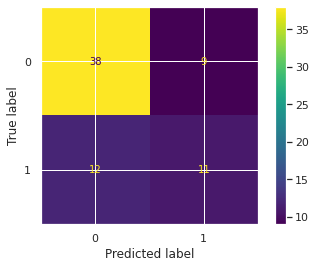

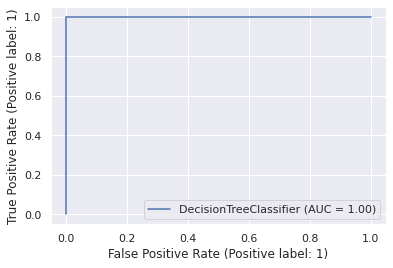

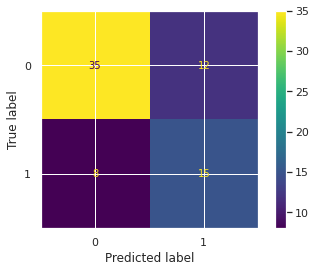

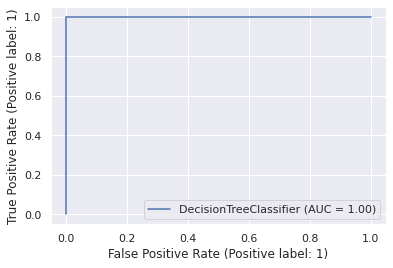

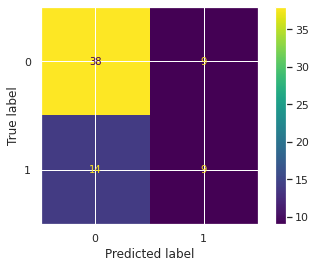

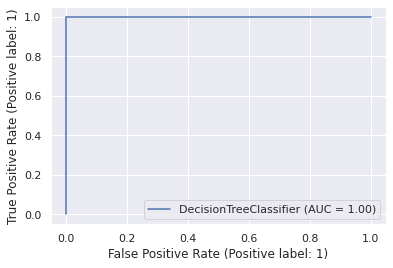

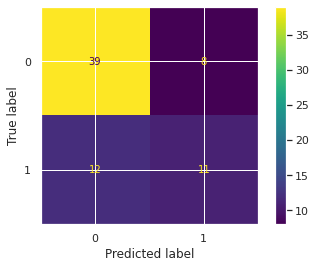

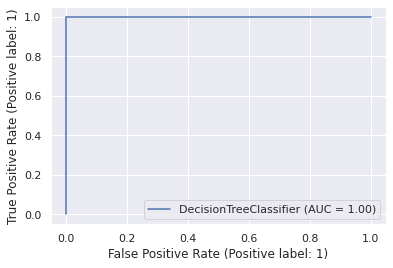

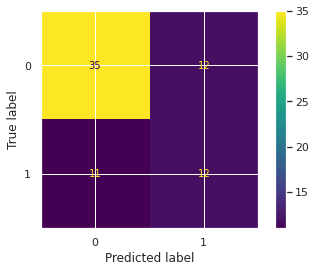

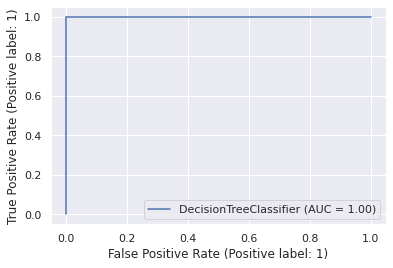

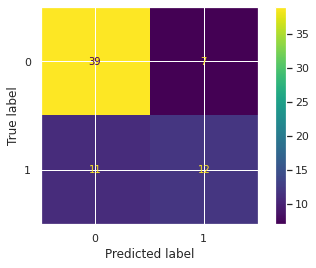

In [ ]:
dataset = pd.read_csv('final.csv')
skf = StratifiedKFold(n_splits=10)
dtree = DecisionTreeClassifier()
x = dataset
y = dataset.Outcome


lll=[]


def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  dtree.fit(x_train, y_train)
  score = dtree.score(x_test,y_test)
  y_pred=dtree.predict(x_test)
  lll.append(score)

  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

  from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,classification_report
  plot_roc_curve(dtree, x_train,y_train)
  plot_confusion_matrix(dtree, x_test,y_test)
  print(classification_report(y_pred,y_test))

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

In [ ]:
print("mean accuracy:",sum(lll)/len(lll))

mean accuracy: 0.6953416149068323


# **SupportVectorMachine**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
x = dataset
y = dataset.Outcome

In [ ]:
def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  svc_model.fit(x_train, y_train)
  score =svc_model.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

For Fold 1 the accuracy is 0.7285714285714285
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        57
           1       0.38      0.69      0.49        13

    accuracy                           0.73        70
   macro avg       0.64      0.71      0.65        70
weighted avg       0.81      0.73      0.75        70

For Fold 2 the accuracy is 0.7714285714285715
              precision    recall  f1-score   support

           0       0.96      0.76      0.85        58
           1       0.42      0.83      0.56        12

    accuracy                           0.77        70
   macro avg       0.69      0.80      0.70        70
weighted avg       0.86      0.77      0.80        70

For Fold 3 the accuracy is 0.7
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        55
           1       0.38      0.60      0.46        15

    accuracy                           0.70        70
   ma

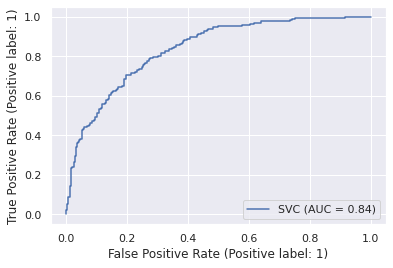

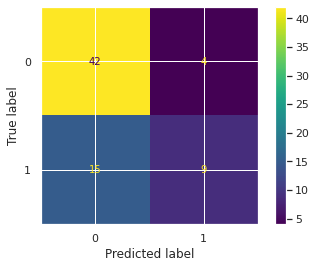

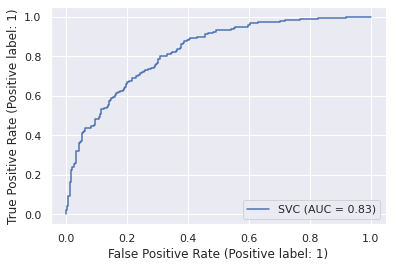

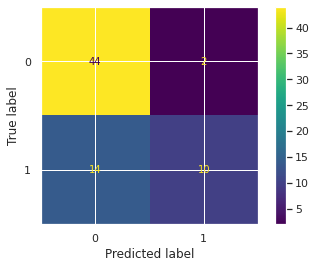

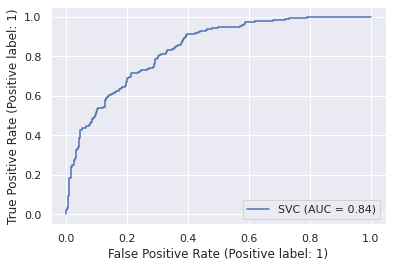

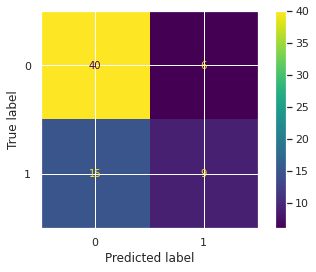

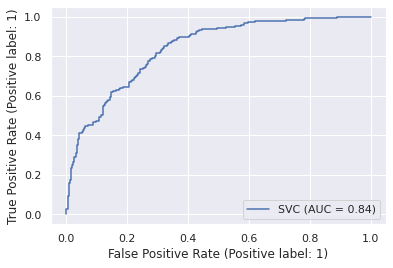

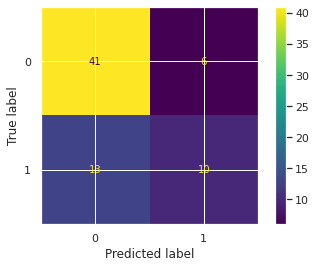

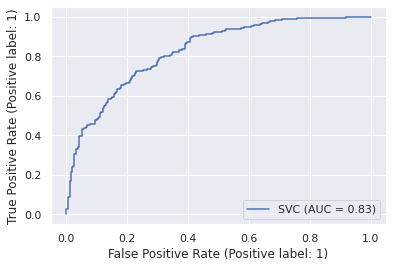

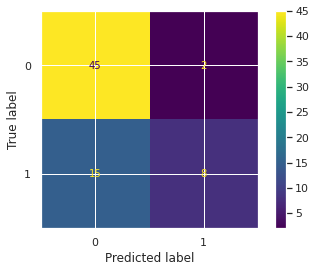

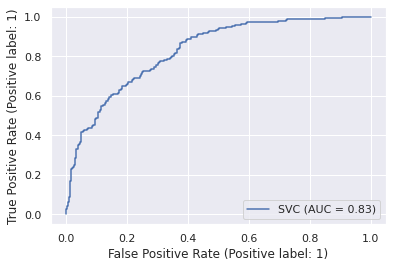

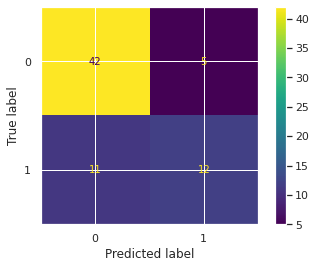

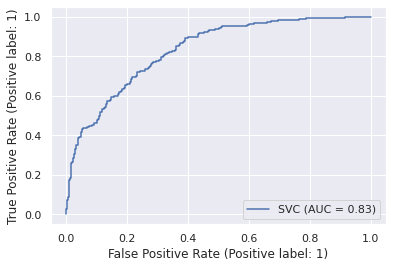

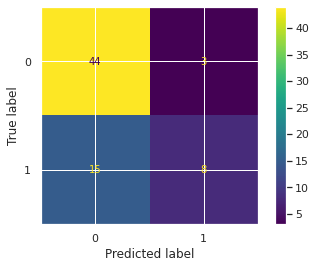

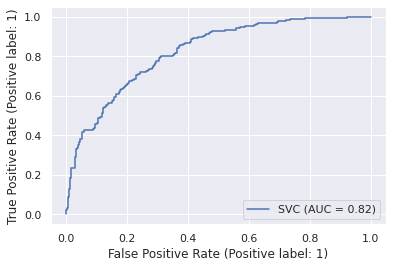

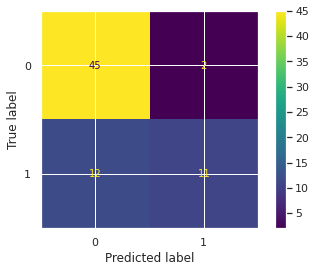

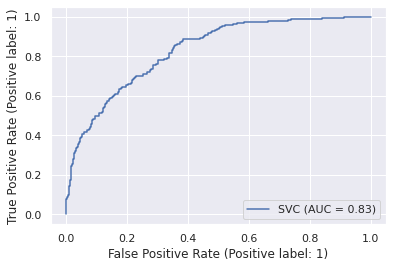

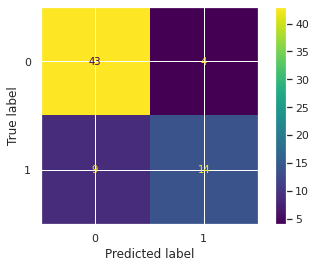

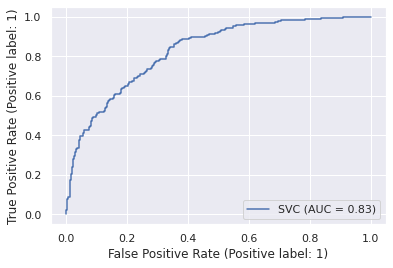

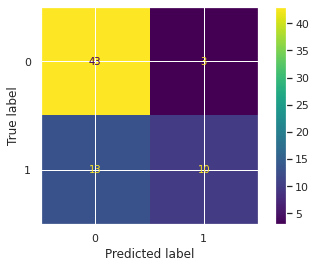

In [ ]:
dataset = pd.read_csv('final.csv')
skf = StratifiedKFold(n_splits=10)
svc_model = SVC()
x = dataset
y = dataset.Outcome

lll=[]

def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  svc_model.fit(x_train, y_train)
  score = svc_model.score(x_test,y_test)
  y_pred=svc_model.predict(x_test)
  lll.append(score)

  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

  from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report
  plot_roc_curve(svc_model, x_train,y_train)
  plot_confusion_matrix(svc_model, x_test,y_test)
  print(classification_report(y_pred,y_test))

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

In [ ]:
print("mean accuracy:",sum(lll)/len(lll))

mean accuracy: 0.7582401656314699


# **LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression_model = LinearRegression()
x = dataset
y = dataset.Outcome

In [ ]:
def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  LinearRegression_model.fit(x_train, y_train)
  score =LinearRegression_model.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

In [ ]:
dataset = pd.read_csv('final.csv')
skf = StratifiedKFold(n_splits=10)
LinearRegression_model = LinearRegression()
x = dataset
y = dataset.Outcome

lll=[]


def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  LinearRegression_model.fit(x_train, y_train)
  score =LinearRegression_model.score(x_test,y_test)
  y_pred=LinearRegression_model.predict(x_test)
  lll.append(score)

  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

  from sklearn.metrics import classification_report

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

For Fold 1 the accuracy is 0.2092796473246581
For Fold 2 the accuracy is 0.3861679226429854
For Fold 3 the accuracy is 0.2802172828994245
For Fold 4 the accuracy is 0.25248478134918917
For Fold 5 the accuracy is 0.35522553343106955
For Fold 6 the accuracy is 0.3167257853099028
For Fold 7 the accuracy is 0.3177818494028527
For Fold 8 the accuracy is 0.4574911978431988
For Fold 9 the accuracy is 0.21644209133799774
For Fold 10 the accuracy is 0.3025364959118474


In [ ]:
print("mean accuracy:",sum(lll)/len(lll))

mean accuracy: 0.30943525874531264


# **KNeighboursClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
x = dataset
y = dataset.Outcome

In [ ]:
def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  knn.fit(x_train, y_train)
  score =knn.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

For Fold 1 the accuracy is 0.6428571428571429
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        47
           1       0.46      0.48      0.47        23

    accuracy                           0.64        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.65      0.64      0.64        70

For Fold 2 the accuracy is 0.7428571428571429
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        54
           1       0.46      0.69      0.55        16

    accuracy                           0.74        70
   macro avg       0.67      0.72      0.69        70
weighted avg       0.79      0.74      0.76        70

For Fold 3 the accuracy is 0.6714285714285714
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        53
           1       0.38      0.53      0.44        17

    accuracy                           0.67 

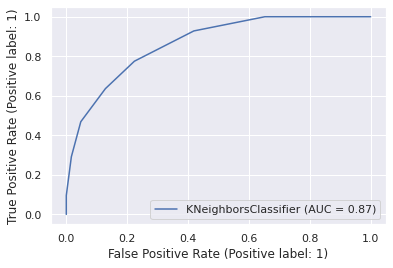

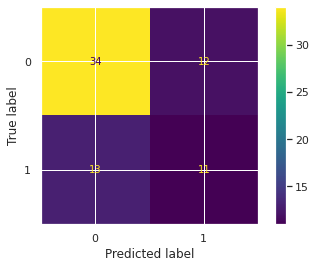

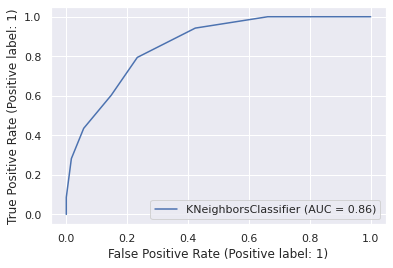

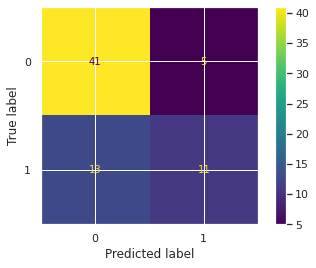

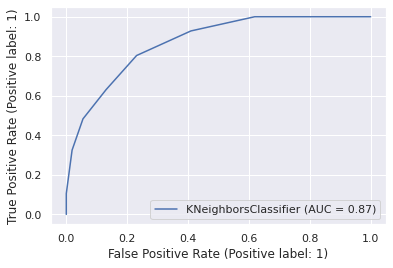

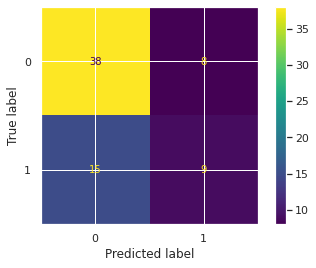

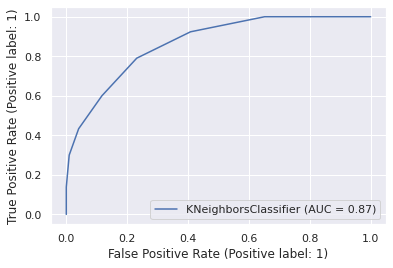

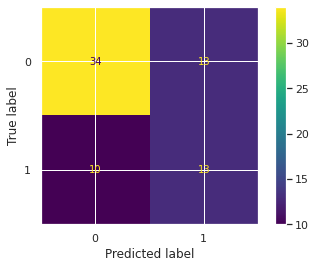

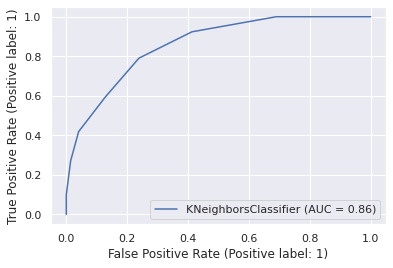

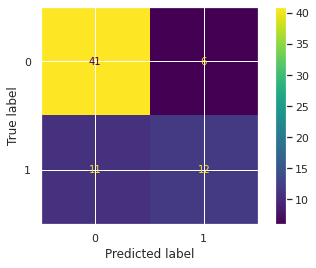

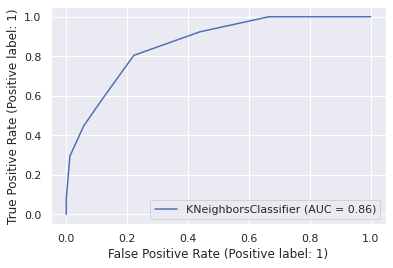

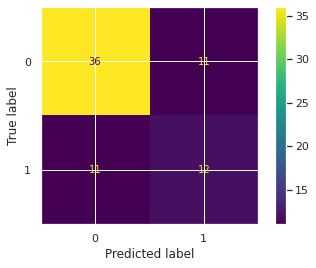

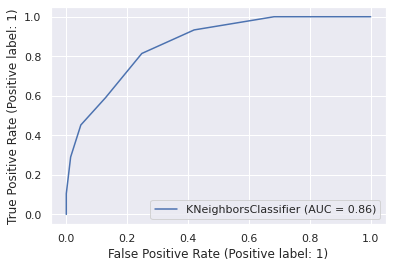

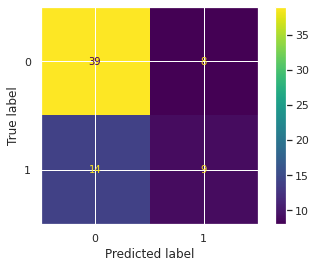

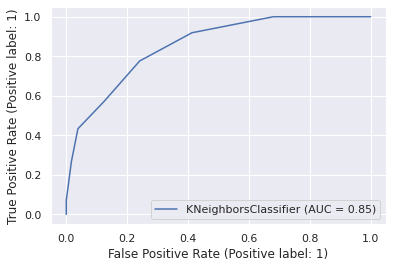

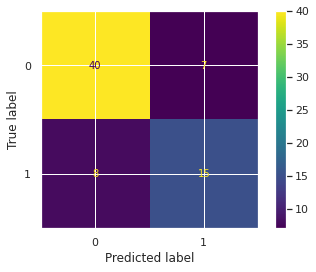

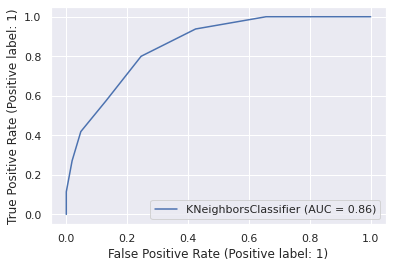

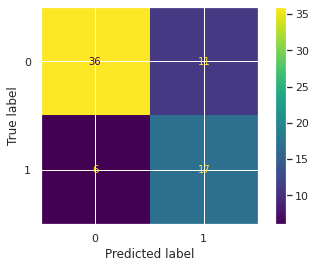

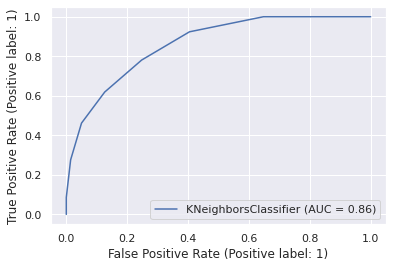

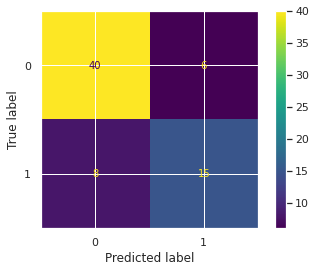

In [ ]:
dataset = pd.read_csv('final.csv')
skf = StratifiedKFold(n_splits=10)
knn = KNeighborsClassifier(n_neighbors=7)
x = dataset
y = dataset.Outcome

lll=[]

def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  knn.fit(x_train, y_train)
  score = knn.score(x_test,y_test)
  y_pred=knn.predict(x_test)
  lll.append(score)

  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

  from sklearn.metrics import plot_roc_curve , plot_confusion_matrix , classification_report
  plot_roc_curve(knn, x_train,y_train)
  plot_confusion_matrix(knn, x_test,y_test)
  print(classification_report(y_pred,y_test))


fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

In [ ]:
print("mean accuracy:",sum(lll)/len(lll))

mean accuracy: 0.7197101449275362


# **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
x = dataset
y = dataset.Outcome

In [ ]:
def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  from sklearn.naive_bayes import GaussianNB
  Gmodel.fit(x_train, y_train)
  from sklearn.naive_bayes import GaussianNB
  Gmodel.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

For Fold 1 the accuracy is 0.7285714285714285
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        43
           1       0.67      0.59      0.63        27

    accuracy                           0.73        70
   macro avg       0.71      0.70      0.71        70
weighted avg       0.72      0.73      0.73        70

For Fold 2 the accuracy is 0.8
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.67      0.73      0.70        22

    accuracy                           0.80        70
   macro avg       0.77      0.78      0.77        70
weighted avg       0.81      0.80      0.80        70

For Fold 3 the accuracy is 0.7428571428571429
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        50
           1       0.54      0.65      0.59        20

    accuracy                           0.74        70
   ma

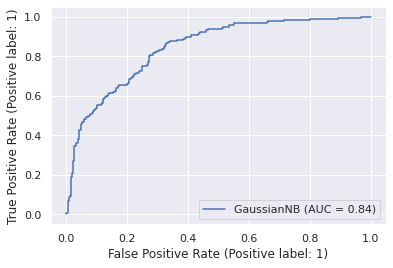

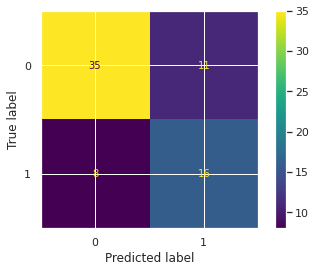

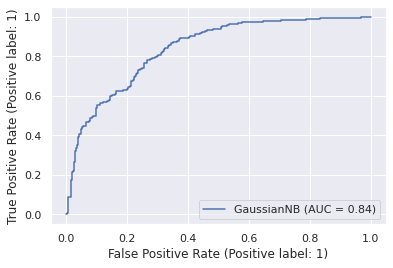

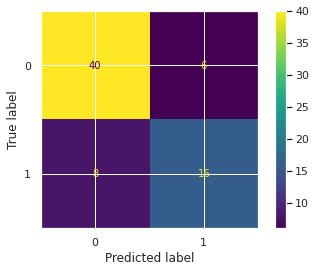

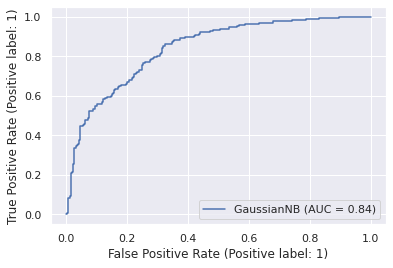

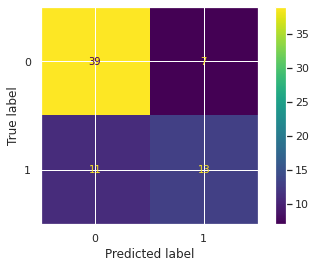

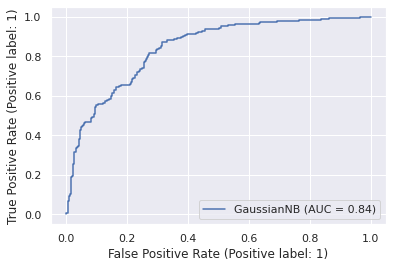

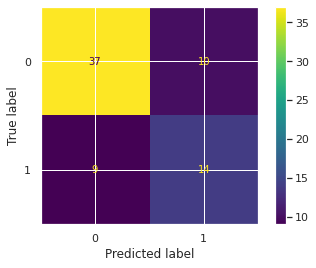

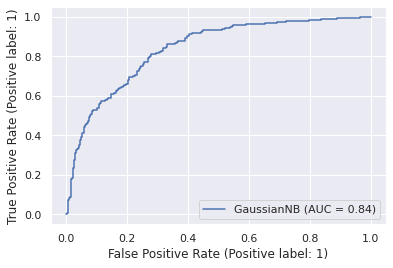

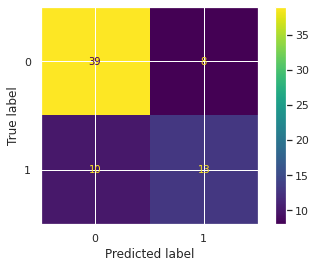

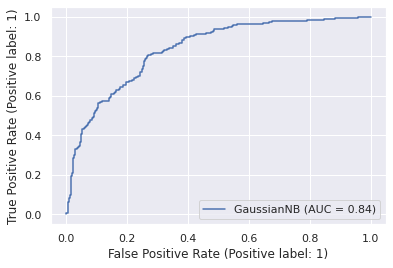

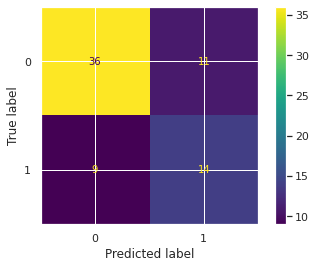

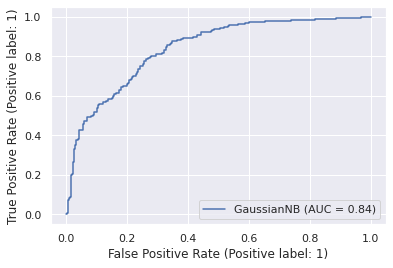

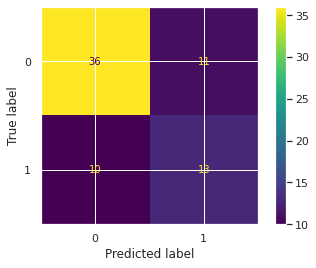

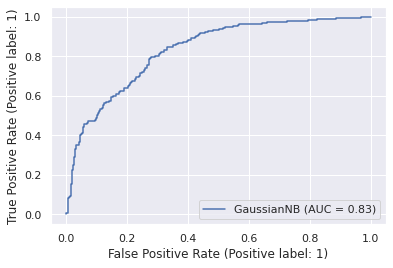

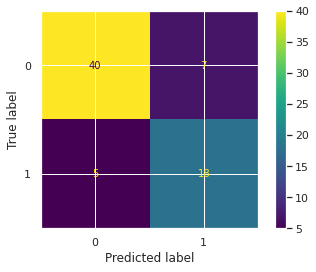

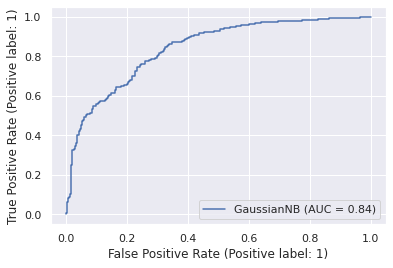

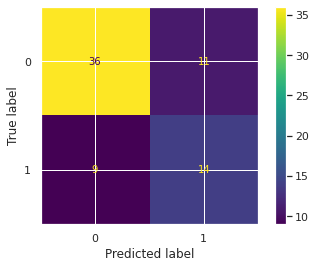

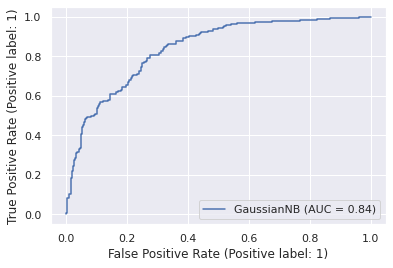

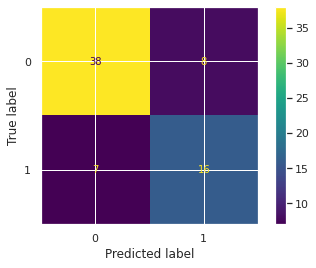

In [ ]:
dataset = pd.read_csv('final.csv')
skf = StratifiedKFold(n_splits=10)
Gmodel=GaussianNB()
x = dataset
y = dataset.Outcome

lll=[]

def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  Gmodel.fit(x_train, y_train)
  score =Gmodel.score(x_test,y_test)
  y_pred=Gmodel.predict(x_test)
  lll.append(score)

  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

  from sklearn.metrics import plot_roc_curve , plot_confusion_matrix , classification_report
  plot_roc_curve(Gmodel, x_train,y_train)
  plot_confusion_matrix(Gmodel, x_test,y_test)
  print(classification_report(y_pred,y_test))

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

In [ ]:
print("mean accuracy:",sum(lll)/len(lll))

mean accuracy: 0.7482608695652174


# **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
x = dataset
y = dataset.Outcome

In [ ]:
def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  clf.fit(x_train, y_train)
  score =clf.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

For Fold 1 the accuracy is 0.6428571428571429
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        47
           1       0.46      0.48      0.47        23

    accuracy                           0.64        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.65      0.64      0.64        70

For Fold 2 the accuracy is 0.7428571428571429
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        54
           1       0.46      0.69      0.55        16

    accuracy                           0.74        70
   macro avg       0.67      0.72      0.69        70
weighted avg       0.79      0.74      0.76        70

For Fold 3 the accuracy is 0.6714285714285714
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        53
           1       0.38      0.53      0.44        17

    accuracy                           0.67 

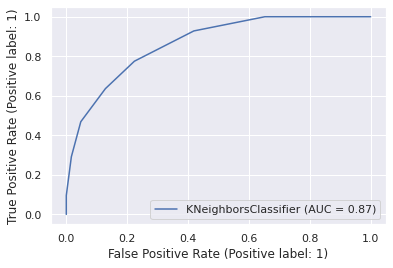

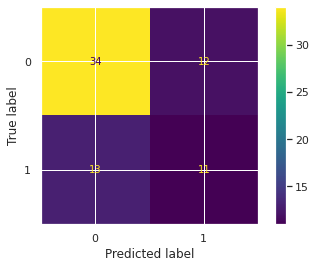

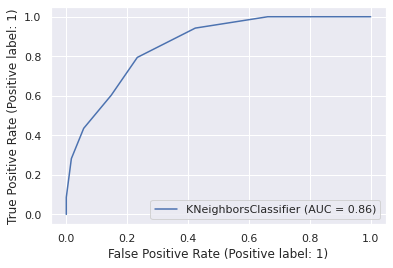

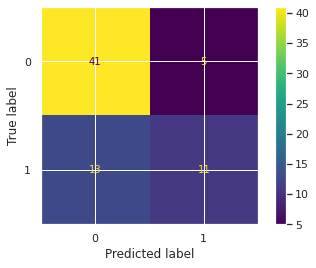

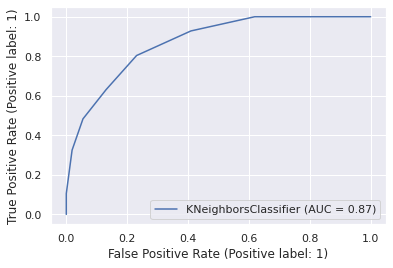

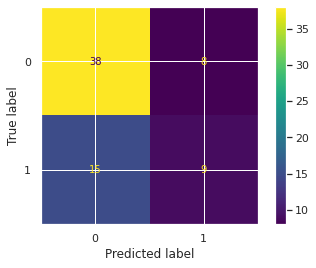

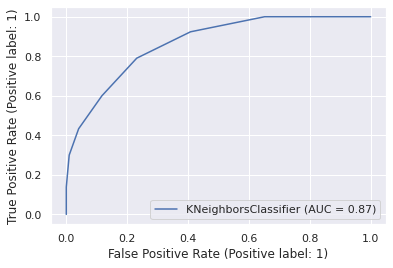

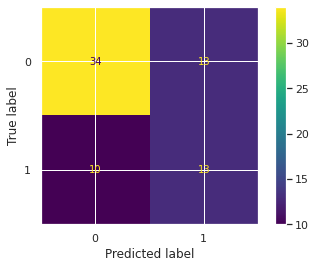

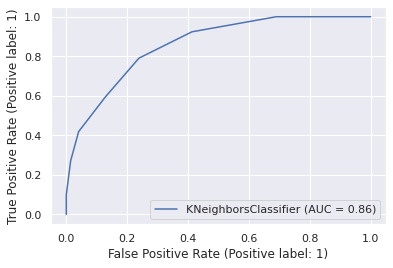

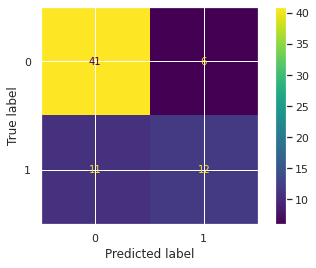

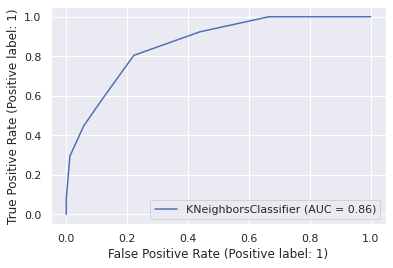

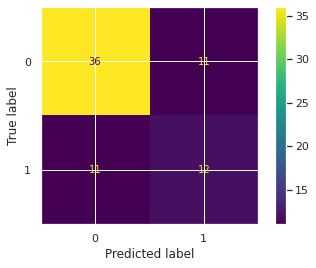

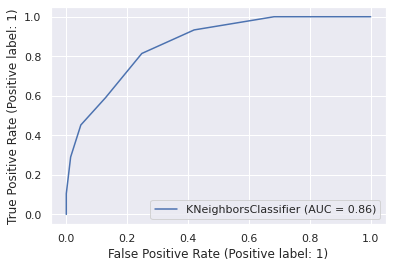

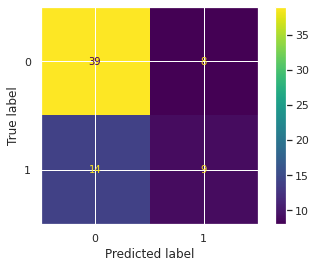

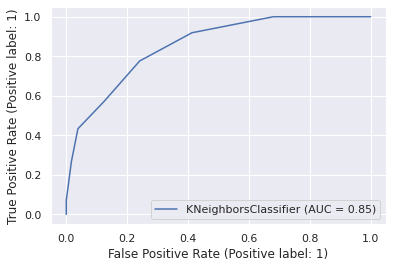

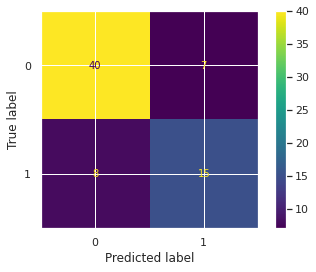

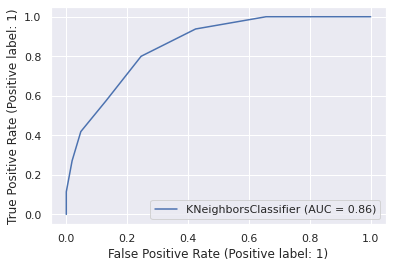

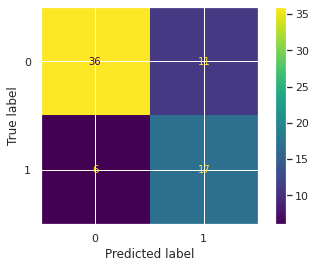

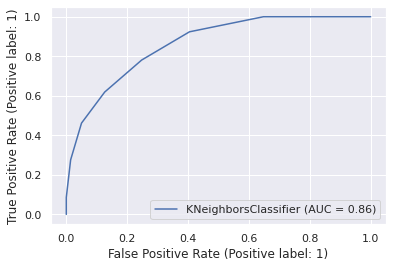

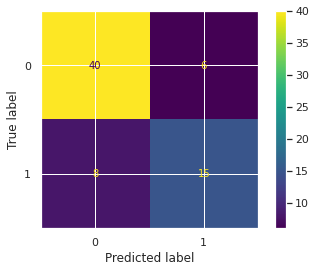

In [ ]:
dataset = pd.read_csv('final.csv')
skf = StratifiedKFold(n_splits=10)
clf = KNeighborsClassifier(n_neighbors=7)
x = dataset
y = dataset.Outcome

lll=[]

def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  clf.fit(x_train, y_train)
  score = clf.score(x_test,y_test)
  y_pred=clf.predict(x_test)
  lll.append(score)

  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

  from sklearn.metrics import plot_roc_curve , plot_confusion_matrix , classification_report
  plot_roc_curve(clf, x_train,y_train)
  plot_confusion_matrix(clf , x_test,y_test)
  print(classification_report(y_pred,y_test))

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

In [ ]:
print("mean accuracy:",sum(lll)/len(lll))

mean accuracy: 0.7197101449275362
